#Imports

In [1]:
!pip install pycaret
!pip install catboost

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
import pycaret
from pycaret.classification import ClassificationExperiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 757.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [2]:
!git clone https://github.com/vassert32/credit_scoring

Cloning into 'credit_scoring'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 36 (delta 8), reused 21 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 288.90 KiB | 2.72 MiB/s, done.
Resolving deltas: 100% (8/8), done.


#Data Understanding

In [3]:
df = pd.read_csv("/content/credit_scoring/data/raw/bank.csv", delimiter=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
print(df.isnull().sum())
df.info()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 

In [5]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [6]:
objects_df = df.select_dtypes(include=['object']).columns
for column in objects_df:
    print(f"Unique objects of {column}: {df[column].unique()}")

Unique objects of job: ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
Unique objects of marital: ['married' 'single' 'divorced']
Unique objects of education: ['primary' 'secondary' 'tertiary' 'unknown']
Unique objects of default: ['no' 'yes']
Unique objects of housing: ['no' 'yes']
Unique objects of loan: ['no' 'yes']
Unique objects of contact: ['cellular' 'unknown' 'telephone']
Unique objects of month: ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
Unique objects of poutcome: ['unknown' 'failure' 'other' 'success']
Unique objects of y: ['no' 'yes']


#  Hypotheses

Вот 10 возможных гипотез по представленным данным для задачи кредитного скоринга:

### 1. **Возраст заемщика влияет на вероятность дефолта**:
   - Гипотеза: Молодые заемщики (например, до 25 лет) или пожилые заемщики (например, старше 60 лет) чаще сталкиваются с финансовыми трудностями и могут не справиться с выплатами по кредиту.

### 2. **Заемщики с высоким уровнем образования реже попадают в дефолт**:
   - Гипотеза: Люди с высоким уровнем образования, как правило, имеют более высокую заработную плату и финансовую стабильность, что снижает вероятность дефолта.

### 3. **Семейное положение влияет на кредитоспособность**:
   - Гипотеза: Люди, состоящие в браке, чаще имеют более стабильные финансовые обязательства и более ответственны по отношению к выплатам по кредитам, чем одинокие заемщики.

### 4. **Заемщики, которые уже были в дефолте, более склонны к повторному дефолту**:
   - Гипотеза: Если заемщик уже имеет историю дефолта, он будет более склонен к повторению такого поведения.

### 5. **Больший баланс на счете заемщика ассоциируется с более низким риском дефолта**:
   - Гипотеза: Заемщики с высоким балансом на своих счетах имеют больше средств для погашения долгов, и, следовательно, они менее склонны к дефолту.

### 6. **Наличие жилья снижает риск дефолта**:
   - Гипотеза: Заемщики, владеющие недвижимостью, менее склонны к дефолту, поскольку у них есть дополнительное обеспечение и активы.

### 7. **Сумма кредита влияет на вероятность дефолта**:
   - Гипотеза: Чем выше сумма кредита, тем выше вероятность того, что заемщик может оказаться в затруднительном положении и не сможет своевременно погасить долг.

### 8. **Способ связи с заемщиком может влиять на риск дефолта**:
   - Гипотеза: Заемщики, которые предпочитают связь через электронную почту, могут быть менее склонны к дефолту, чем те, кто предоставляет только телефонные номера.

### 9. **Частота взятия кредитов в прошлом (кампания) увеличивает риск дефолта**:
   - Гипотеза: Люди, которые часто берут кредиты, могут быть менее финансово ответственными или находиться в сложном финансовом положении, что увеличивает вероятность дефолта.

### 10. **Результат предыдущей маркетинговой кампании (poutcome) влияет на результат текущей кампании (y)**:
   - Гипотеза: Если в предыдущей кампании клиент отказался от предложения банка или не смог выплатить кредит, то он, вероятно, откажется или попадет в дефолт в текущей кампании.

### Дополнительные гипотезы:

- **Продолжительность займа (duration)**: Кредиты с более длительным сроком могут быть более рискованными, поскольку у заемщика больше времени для изменения финансового положения.
- **Месяц взятия кредита (month)**: Сезонные колебания могут влиять на вероятность дефолта. Например, в конце года у заемщиков может быть больше расходов (праздники, отпуск), что может повысить вероятность дефолта.

Каждая из этих гипотез может быть проверена с помощью статистического анализа или машинного обучения, анализируя, как определенные переменные влияют на целевую переменную (например, дефолт или нет).

#Exploratory Data Analysis

y
no     4000
yes     521
Name: count, dtype: int64


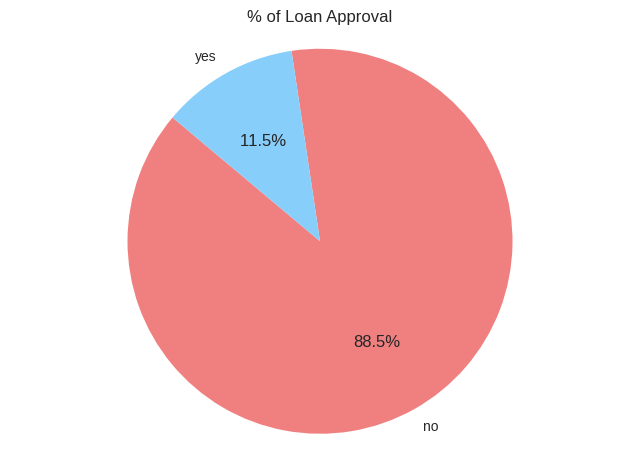

In [7]:
y_counts = df['y'].value_counts()
print(y_counts)
labels = y_counts.index
sizes = y_counts.values

colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=140)
plt.axis('equal')
plt.title('% of Loan Approval')
plt.show()

In [8]:
categorical_df = []
for col in df.columns:
    if df[col].nunique()<10:
        categorical_df.append(col)

print(f'categ numericals columns are {categorical_df}')

categ numericals columns are ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y']


In [9]:
df.groupby('y')['age'].median()

,age
y,
no,39.0
yes,40.0


In [10]:
df.groupby('y')['age'].mean() # разница почти 2 года

,age
y,
no,40.998000
yes,42.491363


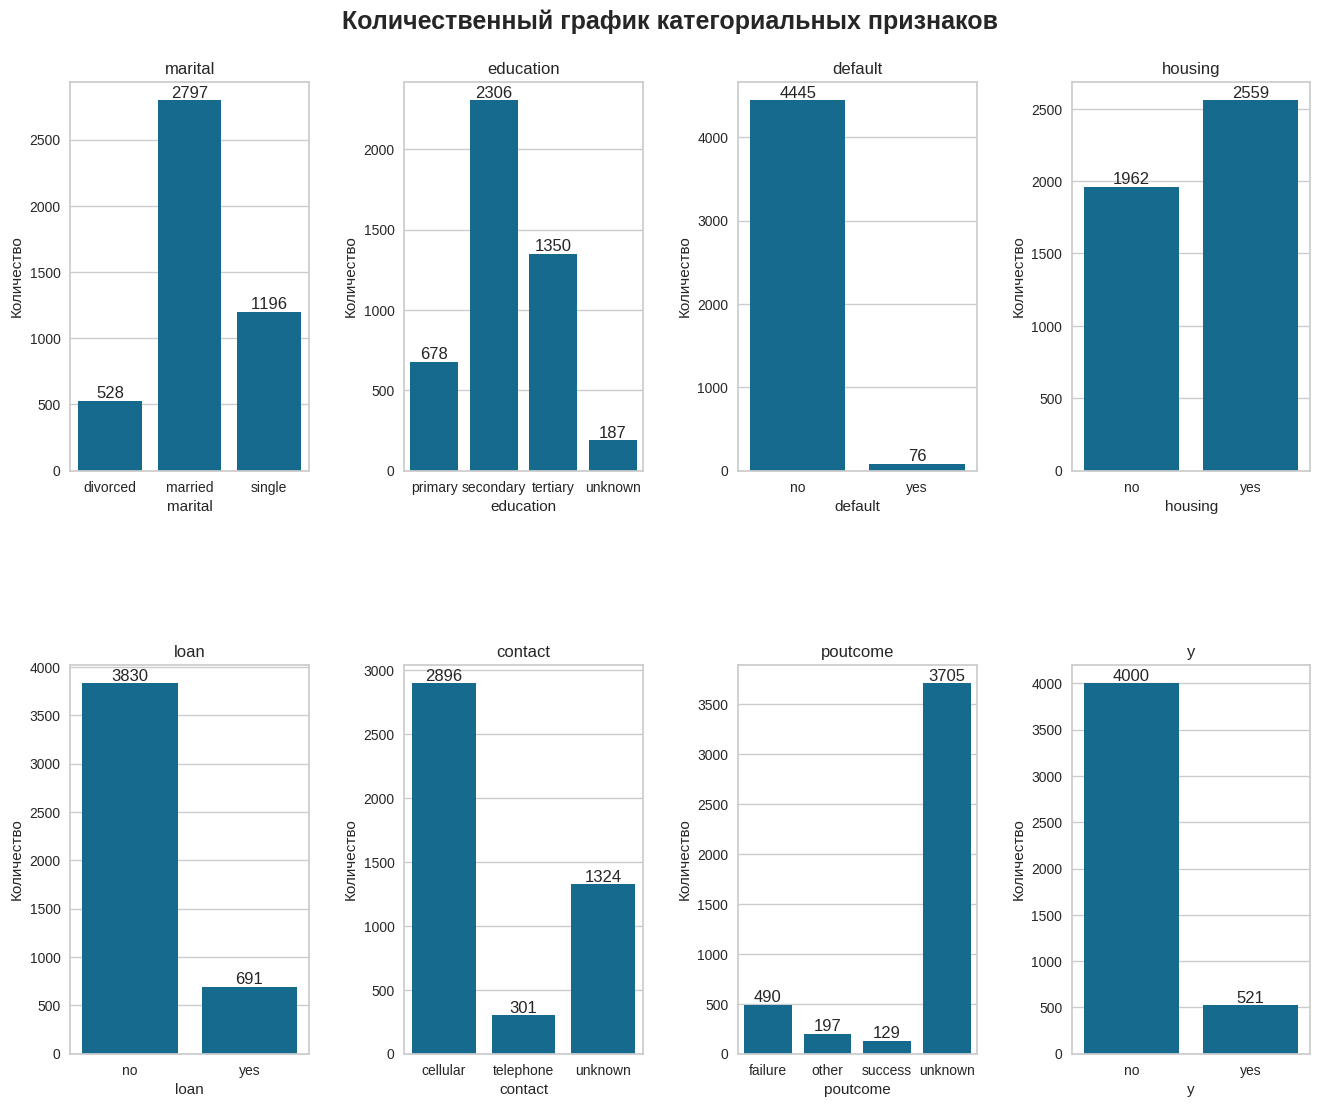

In [12]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Количественный график категориальных признаков', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i , columns in enumerate(categorical_df):
    input = np.unique(df[columns] , return_counts = True)
    col= 'input'
    ax1 = fig.add_subplot(2, 4, i+1);
    ax1 = sns.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]')))
    ax1.set_title(f'{columns}')
    ax1.set_xlabel(f'{columns}')
    ax1.set_ylabel('Количество')
    ax1.bar_label(ax1.containers[0])

In [13]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
print(numerical_df.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


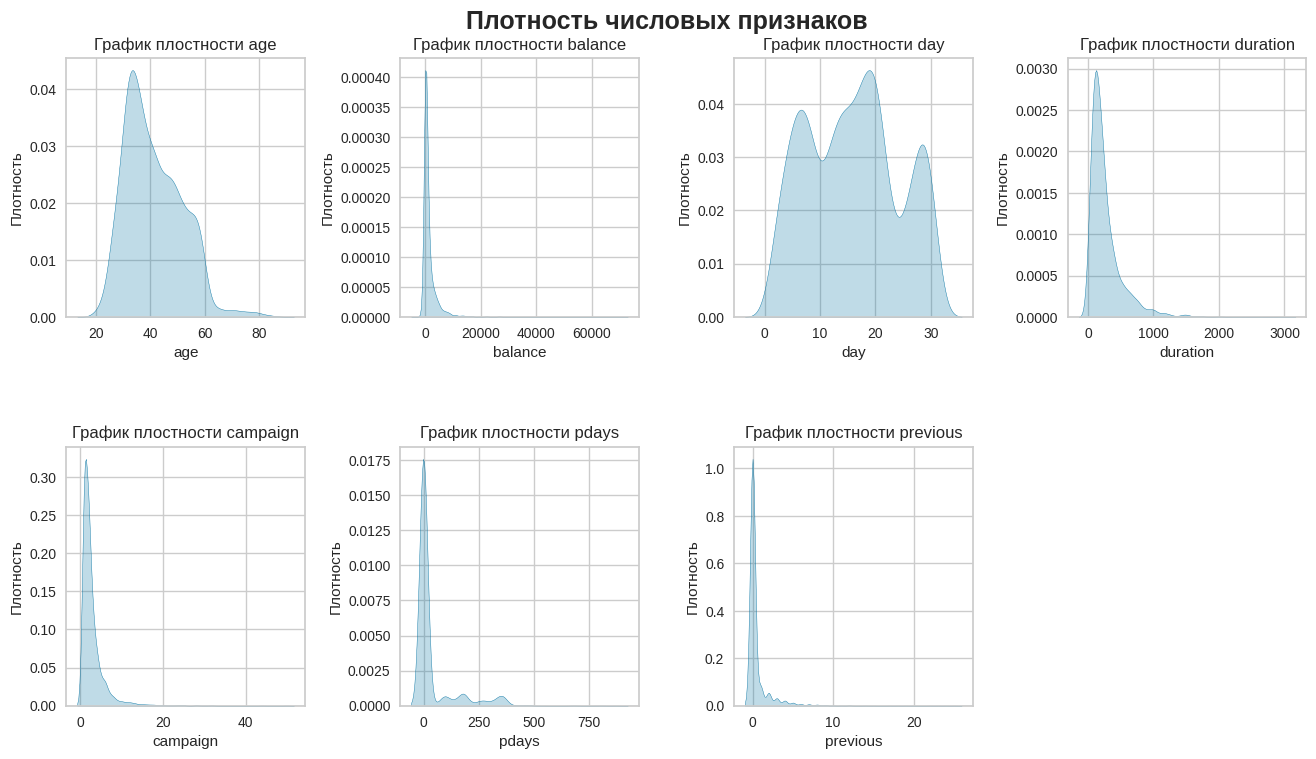

In [14]:
fig = plt.figure(figsize=(16, 8))
fig.suptitle('Плотность числовых признаков', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)

for i, column in enumerate(numerical_df.columns):
    ax = fig.add_subplot(2, 4, i + 1)
    sns.kdeplot(data=numerical_df, x=column, fill=True, ax=ax)
    ax.set_title(f'График плостности {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Плотность')
plt.show()

следущий график мы нормализовали относительно их количества в датасете, это нам покажет что больше повлияет на обучение модели, и каких больше всего признаков.

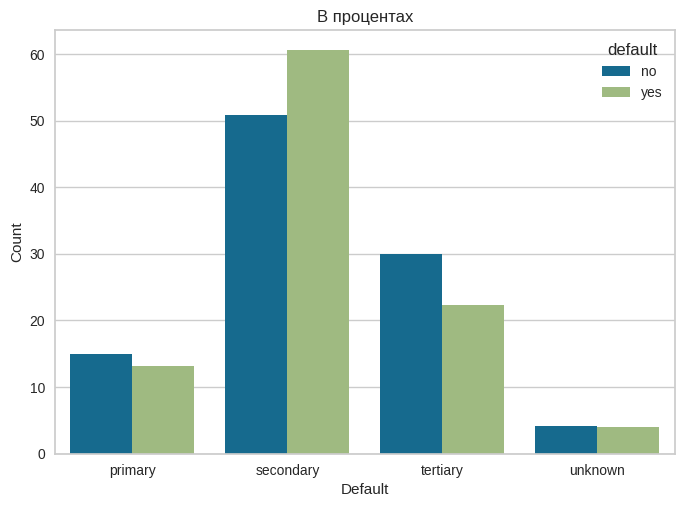

In [15]:
educ_def = (df.groupby(['default'])["education"].value_counts(normalize=True).rename("aboba").mul(100).reset_index().sort_values('education'))
sns.barplot(x='education', y='aboba', hue='default', data=educ_def)
plt.title('В процентах')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

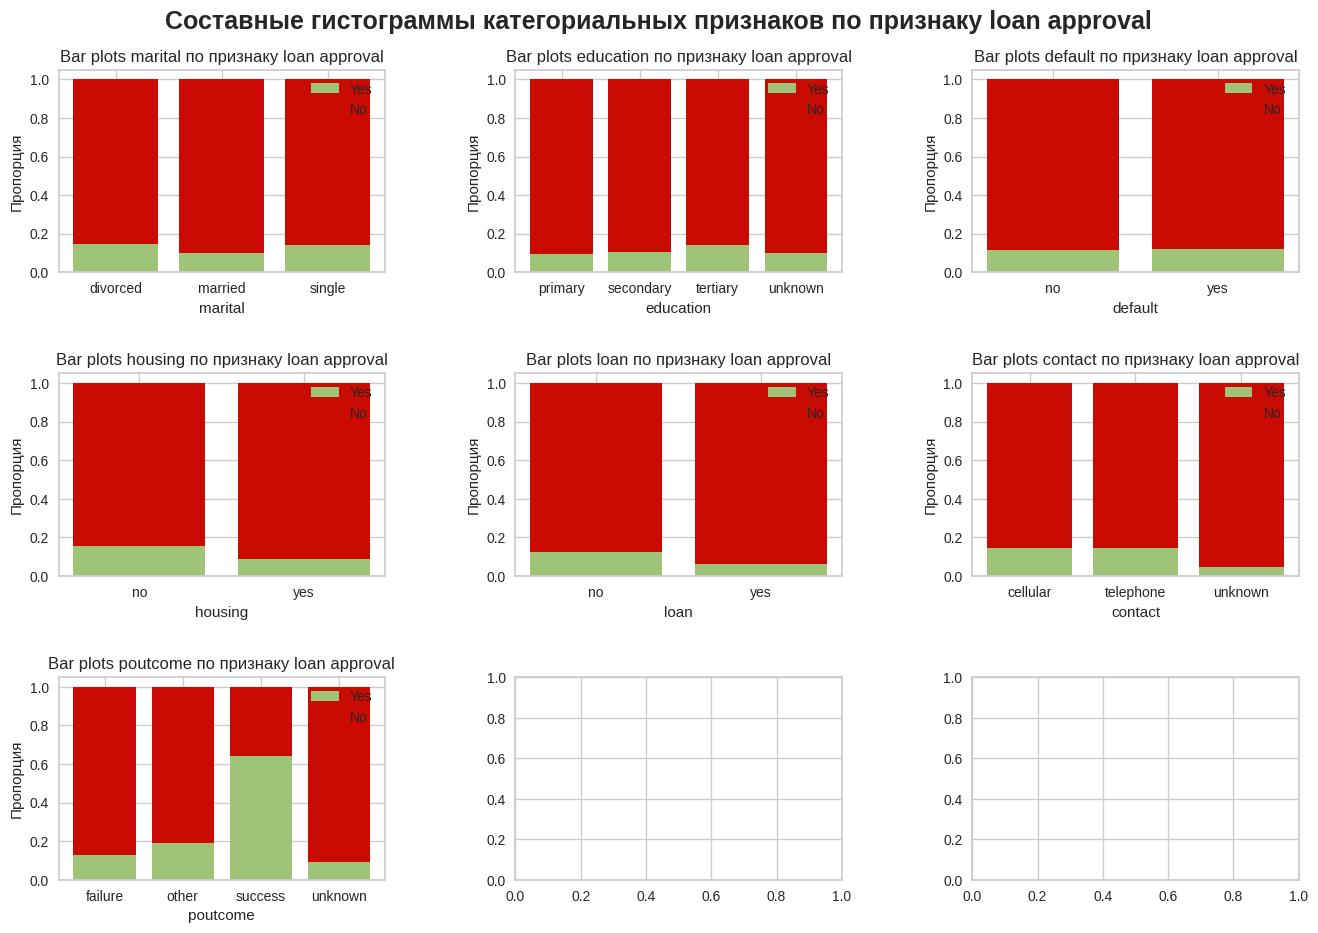

In [16]:
categorical_df = df.select_dtypes(include=['object'])   # выбираем столбцы объектов (категориальные данне)
categorical_df.drop(['y'], axis=1, inplace=True)        # убираем столбец loan aproval (так как по нему мы стакаем)

categorical_cols_to_keep = []
for col in categorical_df.columns:
    if len(categorical_df[col].unique()) < 10:          # берем только столбцы с менее чем 10 уникальными знаечниями
        categorical_cols_to_keep.append(col)

categorical_df = categorical_df[categorical_cols_to_keep]

fig, axes = plt.subplots(3, 3, figsize=(16, 10))    # создаем 9 графиков на поле размеров 16 на 10 дюймов
fig.suptitle('Составные гистограммы категориальных признаков по признаку loan approval', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)                       # отступ от верхней границы
fig.subplots_adjust(hspace=0.5, wspace=0.4)         # отступ между графиками

# проходим по столбцам и создаем стаканые barplot'ы по признаку "y"
for i, column in enumerate(categorical_df.columns):
    ax = axes[i // 3, i % 3]

    crosstab = pd.crosstab(df[column], df['y'])         # кросс таблица количества значений признаков по столбцу 'y'

    proportions = crosstab.div(crosstab.sum(1), axis=0) # расчет пропорции в процентном соотношении (деление всех признаков на сумму строки)

    # составная гистограмма
    ax.bar(proportions.index, proportions['yes'], label='Yes', color='g')   # отрисовка количества "yes"
    ax.bar(proportions.index, proportions['no'], label='No', bottom=proportions['yes'], color='r')  # отрисовка "no" от конца "yes"

    ax.set_title(f'Bar plots {column} по признаку loan approval')
    ax.set_xlabel(column)
    ax.set_ylabel('Пропорция')
    ax.legend()

plt.show()

<Axes: xlabel='housing', ylabel='counts %%%'>

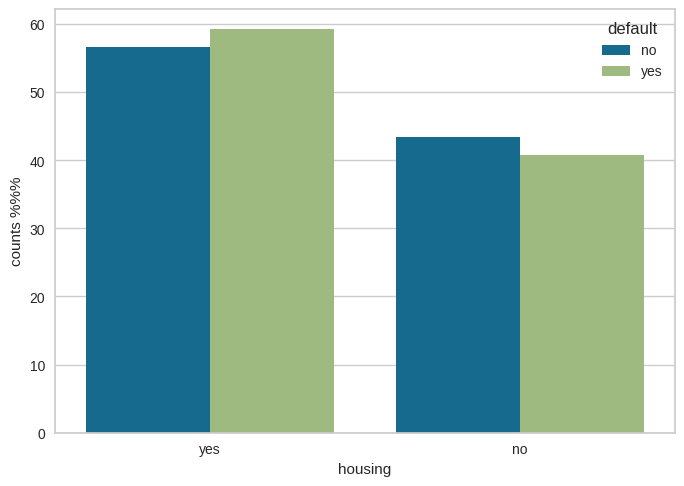

In [17]:
house = (df.groupby(['default'])["housing"].value_counts(normalize=True).rename("counts %%%").mul(100).reset_index())
sns.barplot(x='housing', y='counts %%%', hue='default', data=house)

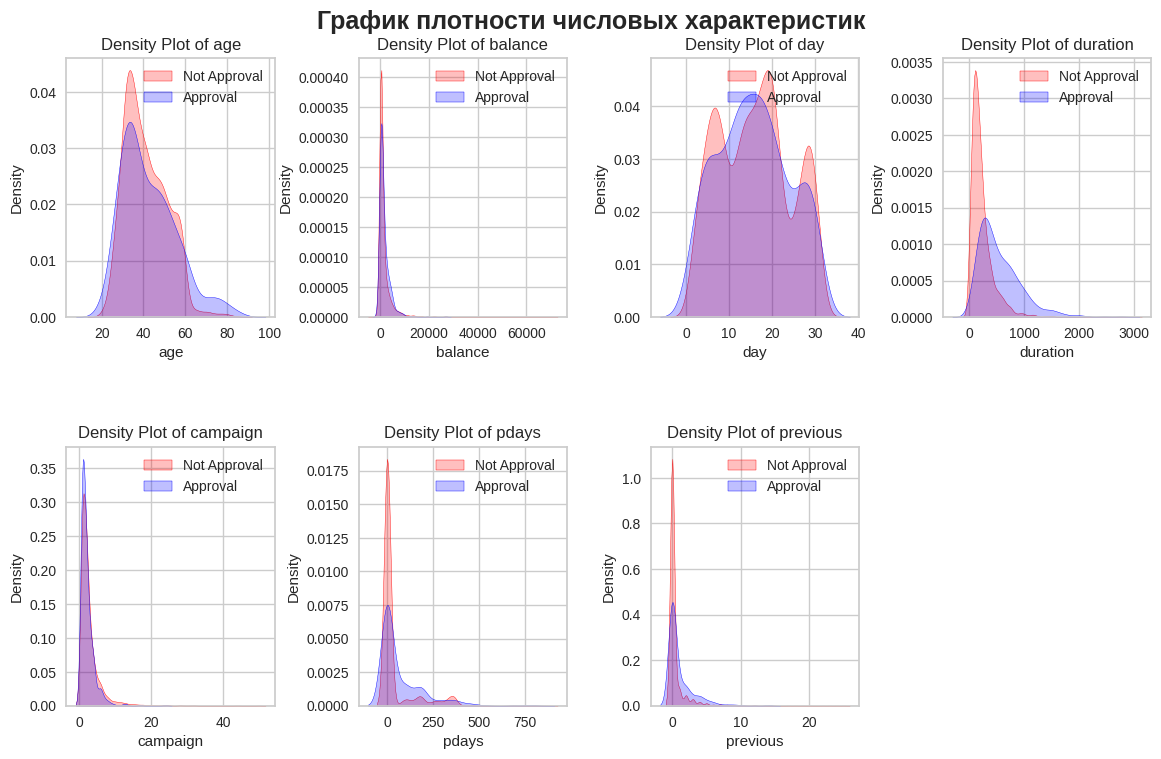

In [18]:
fig = plt.figure(figsize=(14, 8))
fig.suptitle('График плотности числовых характеристик', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# цикл по числовым характеристикам и составление kde графиков по признаку 'y' - loan approval
for i, column in enumerate(numerical_df.columns):
    ax = fig.add_subplot(2, 4, i + 1)
    sns.kdeplot(data=df[df['y'] == 'no'][column], color="Red", shade=True, label="Not Approval")
    sns.kdeplot(data=df[df['y'] == 'yes'][column], color="Blue", shade=True, label="Approval")
    ax.set_title(f'Density Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')
    ax.legend()

plt.show()

Text(0.5, 1.0, 'в процентах')

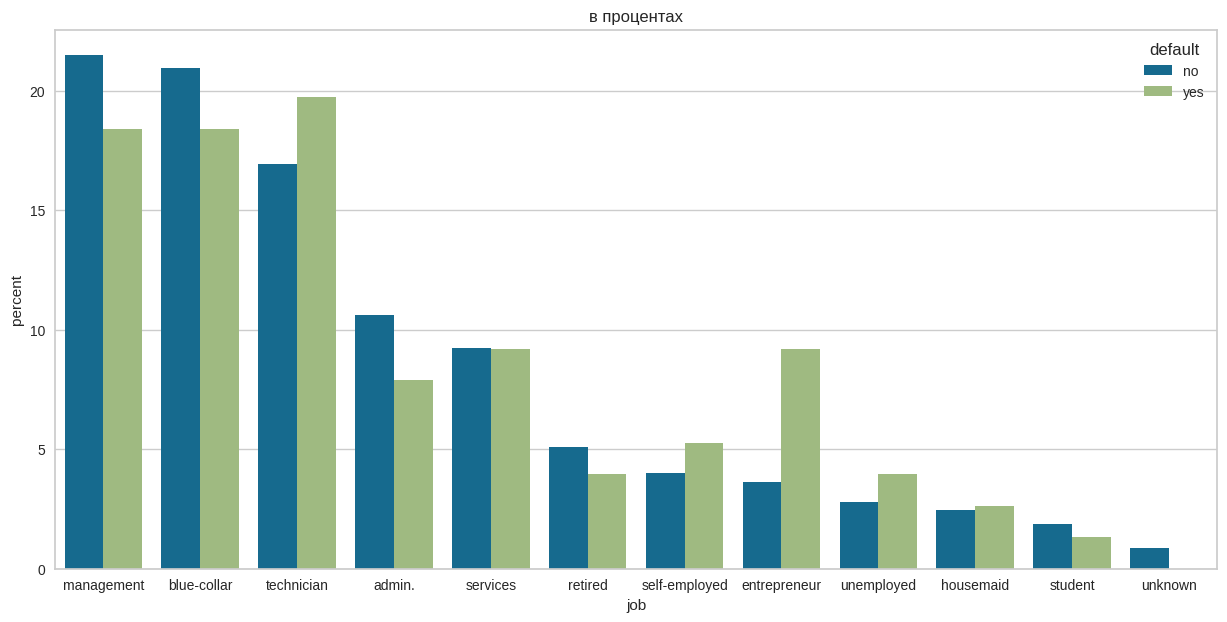

In [19]:
plt.figure(figsize=(15,7))
work_def = (df.groupby(['default'])["job"].value_counts(normalize=True).rename("percent").mul(100).reset_index())
sns.barplot(x='job', y='percent', hue='default', data=work_def)
plt.title('в процентах')

#Preprocessing

In [20]:
object_columns_with_unknown = []
for column in df.columns:
    if 'unknown' in df[column].values:
        object_columns_with_unknown.append(column)
print(object_columns_with_unknown)
# замена пустых значений NaN'ами
df[object_columns_with_unknown] = df[object_columns_with_unknown].replace('unknown', np.nan)

# инициализация импутра для заоплнения пустых значений на моду (самое частое)
categorical_imputer = SimpleImputer(strategy='most_frequent')

# применение импутера - он не пригодился отмена
#df = categorical_imputer.fit_transform(df.select_dtypes(include=['object']))

['job', 'education', 'contact', 'poutcome']


In [21]:
# еще раз проверка уникальных значений
for column in object_columns_with_unknown:
    unique_values = df[column].unique()
    print(f'Unique values for column {column}: {unique_values}')

Unique values for column job: ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired' nan]
Unique values for column education: ['primary' 'secondary' 'tertiary' nan]
Unique values for column contact: ['cellular' nan 'telephone']
Unique values for column poutcome: [nan 'failure' 'other' 'success']


#Encoding Categorical Data

In [22]:
# преобразование категориальных данных лейбл энкодингом
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [23]:
df = df.apply(lambda x: object_to_int(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int64
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int64
 16  y          4521 non-null   int64
dtypes: int64(17)
memory usage: 600.6 KB


In [24]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


#Detect and Reduce Outliers

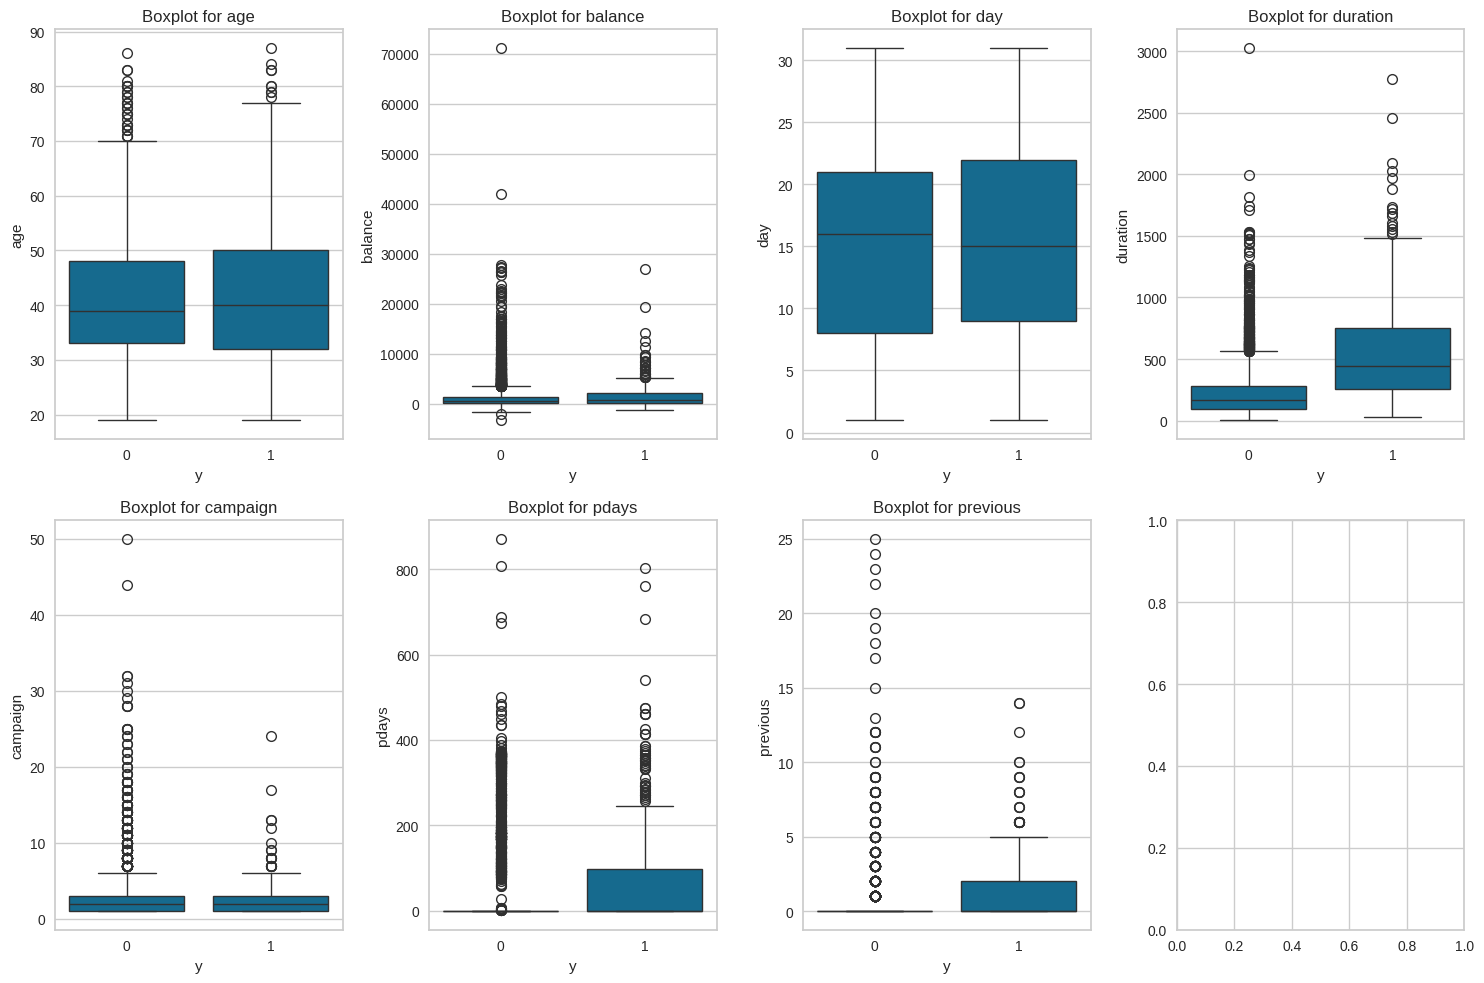

In [25]:
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# создание сабплотов для отображения графиков 3х3
num_rows = 2
num_cols = 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# сглаживание массива осей для простого перебора
axes = axes.flatten()

# проход цикла по категориальным данным и создаем боксплоты
for i, col in enumerate(numerical_columns):
    sns.boxplot(x='y', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')
    if i >= len(numerical_columns):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [26]:
# очистка данных от выбросом квантилями
def remove_outliers_iqr(data, numeric_columns, threshold=1.5):
    Q1 = data[numeric_columns].quantile(0.10)
    Q3 = data[numeric_columns].quantile(0.90)
    IQR = Q3 - Q1

    # строки с выбросами
    outlier_rows = ((data[numeric_columns] < (Q1 - threshold * IQR)) | (data[numeric_columns] > (Q3 + threshold * IQR))).any(axis=1)
    # удаление этих строк
    cleaned_data = data[~outlier_rows]

    return cleaned_data

In [27]:
cleaned_dataset = remove_outliers_iqr(df, numerical_columns)
df = pd.DataFrame(cleaned_dataset)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4209 entries, 0 to 4519
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4209 non-null   int64
 1   job        4209 non-null   int64
 2   marital    4209 non-null   int64
 3   education  4209 non-null   int64
 4   default    4209 non-null   int64
 5   balance    4209 non-null   int64
 6   housing    4209 non-null   int64
 7   loan       4209 non-null   int64
 8   contact    4209 non-null   int64
 9   day        4209 non-null   int64
 10  month      4209 non-null   int64
 11  duration   4209 non-null   int64
 12  campaign   4209 non-null   int64
 13  pdays      4209 non-null   int64
 14  previous   4209 non-null   int64
 15  poutcome   4209 non-null   int64
 16  y          4209 non-null   int64
dtypes: int64(17)
memory usage: 591.9 KB


# Normalize Data

In [28]:
scaler = RobustScaler()
df1 = df[numerical_columns]
df2 = df.drop(numerical_columns,axis=1)
robust_df = scaler.fit_transform(df1)
robust_df = pd.DataFrame(robust_df, columns=numerical_columns)
df2 = pd.DataFrame(df2)
robust_df.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
df_merges = pd.concat([robust_df, df2], axis=1)
df_merges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4209 non-null   float64
 1   balance    4209 non-null   float64
 2   day        4209 non-null   float64
 3   duration   4209 non-null   float64
 4   campaign   4209 non-null   float64
 5   pdays      4209 non-null   float64
 6   previous   4209 non-null   float64
 7   job        4209 non-null   int64  
 8   marital    4209 non-null   int64  
 9   education  4209 non-null   int64  
 10  default    4209 non-null   int64  
 11  housing    4209 non-null   int64  
 12  loan       4209 non-null   int64  
 13  contact    4209 non-null   int64  
 14  month      4209 non-null   int64  
 15  poutcome   4209 non-null   int64  
 16  y          4209 non-null   int64  
dtypes: float64(7), int64(10)
memory usage: 559.1 KB


In [29]:
df_merges.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,-0.5625,1.068858,0.250000,-0.479638,-0.5,0.0,0.0,10,1,0,0,0,0,0,10,3,0
1,-0.3750,3.417840,-0.416667,0.158371,-0.5,340.0,4.0,7,1,1,0,1,1,0,8,0,0
2,-0.2500,0.726917,0.000000,0.000000,-0.5,331.0,1.0,4,2,2,0,1,0,0,0,0,0
3,-0.5625,0.825509,-1.083333,0.063348,1.0,0.0,0.0,4,1,2,0,1,1,2,6,3,0
4,1.2500,-0.329421,-0.916667,0.185520,-0.5,0.0,0.0,1,1,1,0,1,0,2,8,3,0


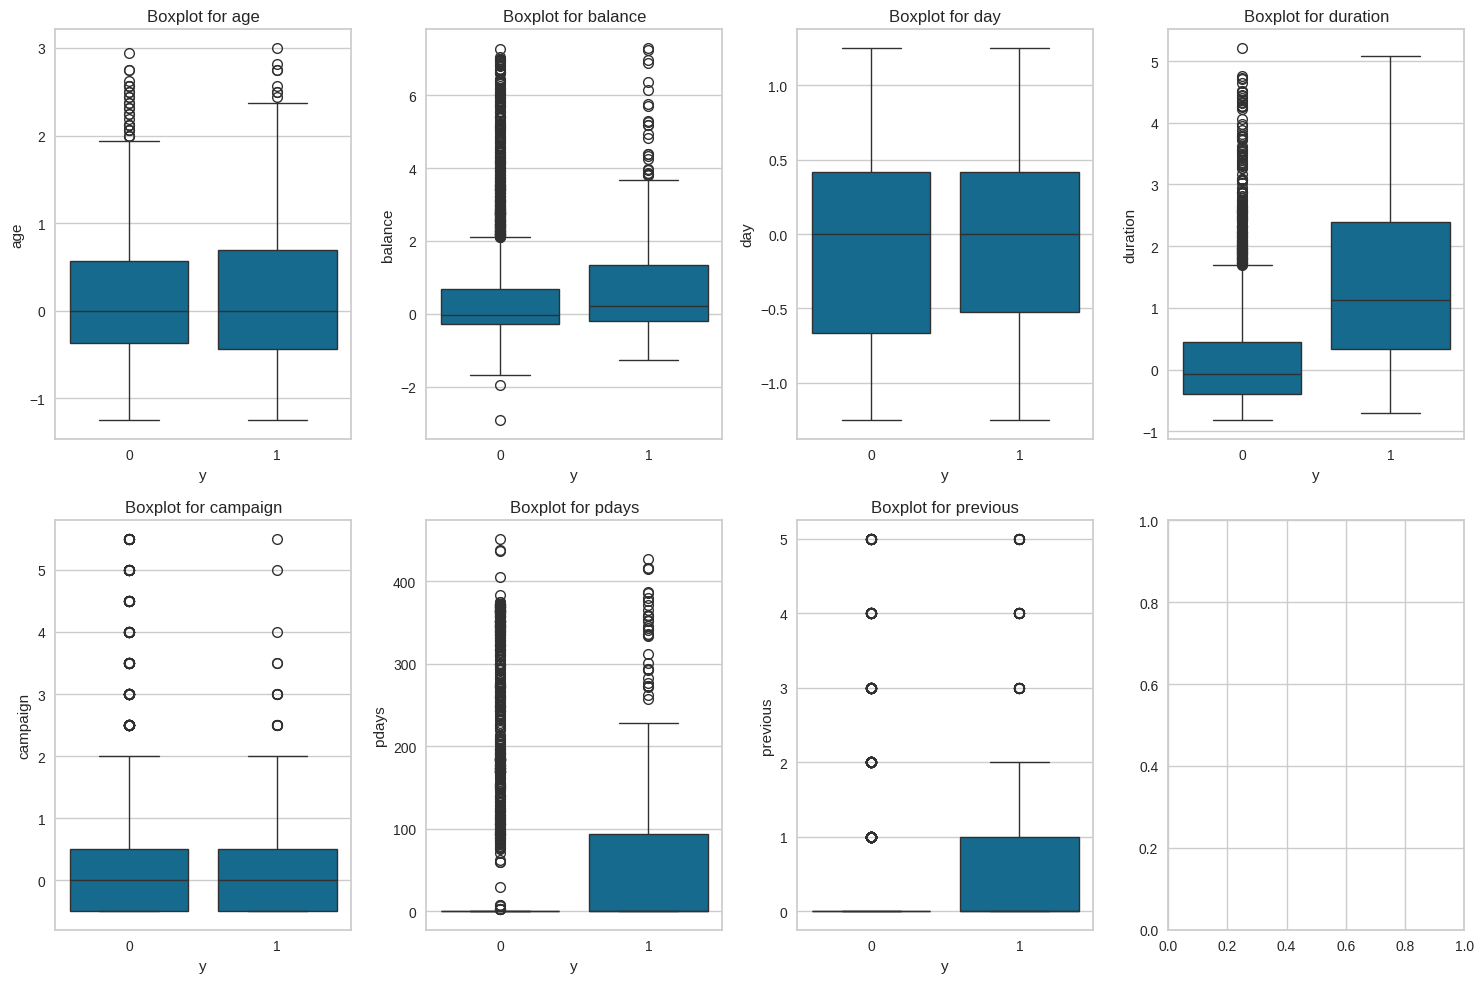

In [30]:
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# создание сабплотов для отображения графиков 3х3
num_rows = 2
num_cols = 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# сглаживание массива осей для простого перебора
axes = axes.flatten()

# проход цикла по категориальным данным и создаем боксплоты
for i, col in enumerate(numerical_columns):
    sns.boxplot(x='y', y=col, data=df_merges, ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')
    if i >= len(numerical_columns):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

#One Hot Encoding

In [31]:
# кодированние one-hot данных, которые были категориальными
one_hot_data = pd.get_dummies(df_merges, columns = ['poutcome','education','marital','month','job'])

In [32]:
one_hot_data.head()

,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,...,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11
0,-0.5625,1.068858,0.250000,-0.479638,-0.5,0.0,0.0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,-0.3750,3.417840,-0.416667,0.158371,-0.5,340.0,4.0,0,1,1,...,False,False,False,False,False,True,False,False,False,False
2,-0.2500,0.726917,0.000000,0.000000,-0.5,331.0,1.0,0,1,0,...,False,False,True,False,False,False,False,False,False,False
3,-0.5625,0.825509,-1.083333,0.063348,1.0,0.0,0.0,0,1,1,...,False,False,True,False,False,False,False,False,False,False
4,1.2500,-0.329421,-0.916667,0.185520,-0.5,0.0,0.0,0,1,0,...,False,False,False,False,False,False,False,False,False,False


#Modeling

In [33]:
# деление датасета по loan approval
X= one_hot_data.drop('y',axis=1)
y= one_hot_data['y']

In [34]:
# размерность X
num_rows_X, num_columns_X = X.shape
print(f'X: Number of rows = {num_rows_X}, Number of columns = {num_columns_X}')

# рзамерность y
num_rows_y = y.shape[0]
print(f'y: Number of rows = {num_rows_y}')

X: Number of rows = 4209, Number of columns = 46
y: Number of rows = 4209


In [35]:
# деление тестовая/обучающая выборка
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                   random_state=104,
                                   test_size=0.25,
                                   shuffle=True)

In [36]:
# оверсемплинг для повышения точности (увеличение количества редких классов)
smote = RandomOverSampler()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [37]:
# размерность ресемплированных данных
num_rows_X_resampled, num_columns_X_resampled = X_resampled.shape
print(f'X_resampled: Number of rows = {num_rows_X_resampled}, Number of columns = {num_columns_X_resampled}')

num_rows_y_resampled = y_resampled.shape[0]
print(f'y_resampled: Number of rows = {num_rows_y_resampled}')

X_resampled: Number of rows = 7498, Number of columns = 46
y_resampled: Number of rows = 7498


In [38]:
# деление сглаженных и ресемплированных данных на тестовую/обучаемую выборки
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled,
                                   random_state=42,
                                   test_size=0.25,
                                   shuffle=True)

#Selection Model by PyCaret

In [39]:
s = ClassificationExperiment()
s.setup(data=one_hot_data, target="y", session_id=1066)
s.compare_models(n_select = 5, sort='Accuracy', fold=5)

,Description,Value
0,Session id,1066
1,Target,y
2,Target type,Binary
3,Original data shape,"(4209, 47)"
4,Transformed data shape,"(4209, 47)"
5,Transformed train set shape,"(2946, 47)"
6,Transformed test set shape,"(1263, 47)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9080,0.8903,0.4629,0.6030,0.5229,0.4731,0.4786,0.0700
ada,Ada Boost Classifier,0.9053,0.8749,0.3790,0.6126,0.4659,0.4172,0.4329,0.3600
lr,Logistic Regression,0.9039,0.8876,0.3228,0.6138,0.4230,0.3761,0.3994,1.8840
ridge,Ridge Classifier,0.9029,0.8908,0.2330,0.6589,0.3415,0.3023,0.3514,0.0600
catboost,CatBoost Classifier,0.9022,0.9136,0.3324,0.5953,0.4254,0.3768,0.3965,4.8040
rf,Random Forest Classifier,0.9012,0.8989,0.2173,0.6454,0.3244,0.2850,0.3352,0.4480
et,Extra Trees Classifier,0.9012,0.8884,0.2298,0.6390,0.3372,0.2963,0.3425,0.4140
lightgbm,Light Gradient Boosting Machine,0.9012,0.9017,0.3539,0.5848,0.4396,0.3889,0.4045,0.3320
gbc,Gradient Boosting Classifier,0.9009,0.8930,0.3260,0.5855,0.4167,0.3676,0.3874,0.9340
xgboost,Extreme Gradient Boosting,0.8978,0.8949,0.3416,0.5596,0.4225,0.3700,0.3845,0.2300


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

[LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001),
 AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=1066),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=1066, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, positive=False, random_state=1066, solver='auto',
                 tol=0.0001),

# Сравнение обучение модели на сбалансированных данных и несбалансированных на примере RandomForest

##Несбалансированные данные

In [40]:
rf = RandomForestClassifier(criterion='gini', max_features='sqrt',
                        n_estimators=100, n_jobs=-1, random_state=1066)
# не оверсемплированные данные
rf.fit(X_train, y_train)
prediction_test = rf.predict(X_test)

print(accuracy_score(y_test, prediction_test))
print(classification_report(y_test, prediction_test))

0.9031339031339032
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       945
           1       0.57      0.22      0.32       108

    accuracy                           0.90      1053
   macro avg       0.74      0.60      0.63      1053
weighted avg       0.88      0.90      0.88      1053



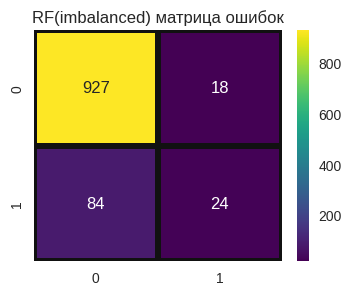

In [41]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3,cmap="viridis")

plt.title("RF(imbalanced) матрица ошибок",fontsize=12)
plt.show()

##Сбалансированные данные

In [42]:
rfs = RandomForestClassifier(criterion='gini', max_features='sqrt',
                        n_estimators=100, n_jobs=-1, random_state=1066)
# оверсемплированные (сбалансированные) данные
rfs.fit(X_train_smote, y_train_smote)
prediction_test = rf.predict(X_test_smote)
# print(prediction_test)
print(accuracy_score(y_test_smote, prediction_test))
print(classification_report(y_test_smote, prediction_test))

0.9168
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       956
           1       0.99      0.84      0.91       919

    accuracy                           0.92      1875
   macro avg       0.93      0.92      0.92      1875
weighted avg       0.93      0.92      0.92      1875



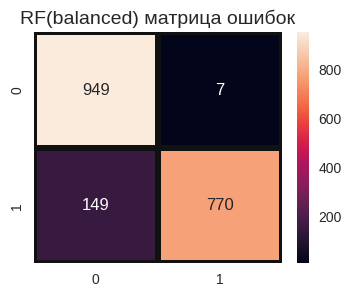

In [43]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test_smote, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("RF(balanced) матрица ошибок",fontsize=14)
plt.show()

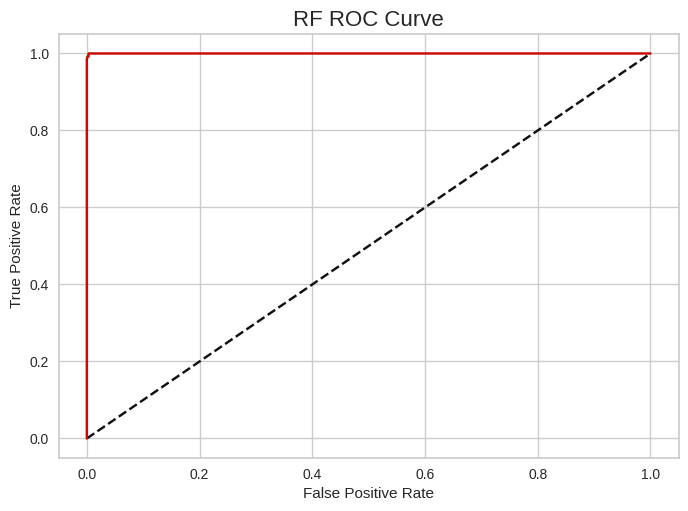

In [44]:
y_rfpred_prob = rfs.predict_proba(X_test_smote)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test_smote, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF ROC Curve',fontsize=16)
plt.show();

In [45]:
# важность фичей
feature_importance = rfs.feature_importances_

# датафрейм важности признаков
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

        Feature  Importance
3      duration    0.323892
1       balance    0.085560
0           age    0.074841
2           day    0.071269
10      contact    0.042194
4      campaign    0.035531
5         pdays    0.026416
13   poutcome_2    0.020418
8       housing    0.017923
30      month_8    0.016284
6      previous    0.015934
32     month_10    0.014965
22      month_0    0.014881
14   poutcome_3    0.014242
9          loan    0.013665
20    marital_1    0.012490
16  education_1    0.010690
17  education_2    0.010583
29      month_7    0.010420
35        job_1    0.010363
23      month_1    0.010247
21    marital_2    0.010184
27      month_5    0.010011
28      month_6    0.009488
38        job_4    0.009345
43        job_9    0.009103
31      month_9    0.008227
25      month_3    0.008154
39        job_5    0.008049
34        job_0    0.007589
15  education_0    0.007556
19    marital_0    0.007198
11   poutcome_0    0.006175
41        job_7    0.006063
42        job_8    0